In [2]:
import os
import glob
import time
import json

import networkx as nx

# Data Paths

In [3]:
data_path = "./Rarible/"

graph_name = "Rarible"

In [4]:
with open(data_path + graph_name + '.json') as f:
    graph_info = json.load(f)
graph_info['name'], graph_info['#nodes'], graph_info['#edges']

('Rarible', 28285, 78505)

# Create NetworkX Graph

In [5]:
#create multidigraph
edges = graph_info["edges"]

graph = nx.MultiDiGraph()
for e in edges:
    u = e[0]
    v = e[1]
    t = e[2]
    graph.add_edge(u, v, timestamp=t)

nx.info(graph)

'Name: \nType: MultiDiGraph\nNumber of nodes: 28285\nNumber of edges: 78505\nAverage in degree:   2.7755\nAverage out degree:   2.7755'

In [6]:
for k,v in nx.degree(graph):
    graph.nodes[k]['degree'] = v
    print(k, v)

#for k,v in nx.clustering(graph).items():
#    graph.nodes[k]['clustering_coeff'] = v
    
#for k,v in nx.betweenness_centrality(graph).items():
#    graph.nodes[k]['betweenness_centrality'] = v
    


0xa8e4416fecae4620bac2cab913d3343daef07e06 48
0x5ea1d56d0dde1ca5b50c277275855f69edefa169 8
0x0000000000000000000000000000000000000000 60157
0x87b90d8635e0e725f0db0ce9926be37f915f930d 3
0xb955f54bc46d7682a232b4f1a3f174e7c7d0fe5a 77
0x85f24ec48009865b7fe2b699d1e4d4485efe99d5 254
0x5be10f3434bc1ac6c0a34f86da39ea0095392f21 59
0x95efb7ce9d9cade588d3a9856e5918206b50450d 3
0x7ffd68ae92ddc5c7d9a3e29e37166823ad0d46db 27
0xcb4d81a15d50a91e8404b1efc5530c253590188b 7
0x154130e0b04c61e764473cdae7a54fa2f7c4a59c 17
0xd05064d50350eb38c1d5d4d1fd8d3497f74742fa 13
0xe308b815d3fcf34ccffbd4fdc483e63090068d70 4
0x49e5c693dc0cc586b6e29e2404b17dc0565ac12b 221
0x689b2ae9bc49a61850ea73b0b83d610b47c034c3 5
0x1c1ce100daeec1b67482e1ada27c522a0d7d8fe5 16
0x19058b87cc3975b2dd7d01b6e95102ab9e1a2a72 4
0xc020f5ba6daa905ebfffef38e672d72db07084c2 2
0xf41589c9d0ef20f354155cbf586ab5ba419f12fa 14
0x2e307ceab1b4c5f4cac508e3b13c3dbfe86a3c81 75
0x24da832c02bcf1421c0febcd40fa5f7b6b194400 4
0x85e5b9f072d1c2d35a4d876e853abd776165

0xf1b8ddb1794679be028932a45cd7cbe50d6fd6d6 19
0x8b50f5b24b2cd5157a3c61da425b385f9c7cb975 6
0x0b8cf49b830082ec28feebda19d909c2f7994e51 6
0xbc91d677f24083720b9ba4d797ea4f1a9239d5f8 35
0x0b2037446d5ed18b770f6fa707c7d39849581766 8
0x6b6d39aa67841ba60a863786db8d06ae65776342 1
0x7b99c763b7b70b05a47db32e78847c3999f671d9 1
0x2cd25fd9926827d04ea8ea55b2f0ca5c1a28f8a2 59
0xe323cf1ca53ddb43e838093016559ea6af78af26 40
0xbfd82bd44b3df57b26e29770d0c8f1690f1c49f1 1
0x8396781b7644b78611b488cfde15992e8912fff5 4
0x782b963114bdcd63f09101c0b7b616fa7dfd0418 3
0xe7cfe8f1bed32c2338008b3ac55f801f7694a4a0 1
0x7d82569f9871726c3259aac2e6057a745c70dc8c 1
0xce7327549fe423dd905afa27ce04d88c0f9a34da 1
0x164fbae6a212bb1ad8906549cb18506eac8cbe2d 2
0xd5e7cab60fac7aa52832f679f8407694616dbccd 3
0x87f2bbf47bf24f17ebaadcef11d6847ee5bedf3e 3
0x36fadeffd72d230844f9ceb91d56ed395afec653 2
0x327b9dee1830f8201efa751fd96f7b1ad0b300a1 1
0xf0d9bbf11790c2dc45eb70405bb31c836b1da0a1 13
0x61c498d5e2eeb6ba6e866a9f3246bf044f9e2251 1
0xd8c

0xa90456a410b68a34a6bb402d14f64740a620af06 2
0x5d09ec8d7dea83f25c8d932d5b386b18de13e14b 11
0x96e50f5a76743bbe18e8fe2b11b19897a5d0a074 1
0x2c190c726f79432bfcf79b6c400faf0166190312 4
0xb4d13125a01a940870802c114a4c8b89df6df21c 12
0x29933317d9d7d5882a1201afeac696c553a5fde6 11
0xbfac82d4a08328117bf9018a546b940da4c3e914 1
0x302111adcf609f019c2a5d2ca7cc71f1c4e6b5bd 11
0x1f9efdd2de98fafa9f92b9215a7ad0f7add4e38d 10
0xace46b6de02783350ab7f98ea169182bca1c4877 2
0x58040ae3ac9425bc7cd06a8ce3fbef163173a756 1
0x846ead303a7263ba754780a85d2d29c138d125f5 2
0xbe6698ffba40d33eb0d6e14293f5f5338afbbb42 1
0xf26c5cbe8d89bfe714bef47a758404f4db5048d7 6
0xe6253b4c7f5464811b145134a1f5c211a6cc0b23 13
0x795b785a2dc531c4abf5a89e4bc83d0b01d3abba 1
0xfb2c3998c93364ad1a6bdf49b0e4da03043a451b 1
0xfbc59eb2a18c1412c4a8662de272ba9c33eafdc4 2
0x9ae771fe37edab3fa8bd6b668a7db241f536ca8d 1
0x0f79a3cbeb51319e848dba35325f2dca0de49b1a 1
0xce7acba392272520190f53e1f33a22e0503a2f8a 1
0x947c4e16cc6bb885368fd7dcdf0e7904852be9f8 2
0x13

0x81f744604aecf5657997208cac2dd0ea3d5c0b08 1
0xa8e376248fb85dd9680fdbeecc3ec72e20c37cac 4
0xcafc538c5d96d50034573d7d992279875c06b722 8
0x5abedee4cf10bd60241b50fd8233b3a90370ada1 1
0x6f22649b860105d80c78a52b8437b53c4d074826 1
0x8ee927f5a31eba81b02ab1ffc74289b32a505d35 1
0x7715ff8dc18ef5dfc7d34036d31bf44cff9edc20 1
0xc44a70458462a2b805ddd691d615305c5f56b7ee 1
0x0a1015833ca18757b5be1bce3381f0fe95ef8ce5 8
0xaffb65099fc85dd016c07f4b84b95e7a92d6915f 3
0x6df5bb0f25ed2047867089f70cf8b7389233e1b8 10
0xf22ad58f303bf58ee81d9504644c72a2d4842e8f 1
0xba008ec024511ee309152b0010335b8f9cf5ba5b 1
0x6c8b648c156490054d3127c4447d36773262619c 6
0x14a5ef722e0dd6d37652f46a12967b615a211556 5
0xfb9416cb0f21012f75f45ea33950fc038cc3071b 2
0x56ba21b68b9f417e8e8e914e151e46c92721bcaa 6
0x1c000f995859b59db7ddf49771478df7e2cbfd49 1
0xda57cf6ce0fa64d7257f026a64f83e03083896c7 1
0x61a17076f014fd248d72258bc9ccbaeba49ccd8c 2
0xc65ce339aebc9a309cd9fd641fb042942f460c90 2
0x47b306c725fe30223663189701e1c336fec2f520 5
0x9e39afa

0xecdd7902903077f4d185d5fae4895318a050ae85 1
0x6632d36f72e8a55a817c89392d09529efe0d6978 7
0x7c15729f92dce616506b39b33a7cb916c30dafdc 1
0x75cce5797568ff59f971e65519bc7226e4393271 2
0xbce772f77e59d6676628281018d7816a186f6494 1
0xc7a969de7da56f17fb7e3defd08cd4d02f2e6728 1
0xf3f561732c6bf14bb160480c8b8ab734fdbfb7b9 36
0xdbf32b49ecf6423d87ec96b97da86321efa940d6 5
0x7565deddcb83a14b185eb9520914bb918cdfe983 10
0x4345df668e972a05790457a351af2d865027abf9 9
0xccea4c1817b8fa45dae0eca559ebe8996c8c199b 2
0x4bf5a8650e1c0755e6cbb2c27d003d6e6b9e2dc1 1
0x0f9dacf1c1653b03c06b1dd692a7a60cdbc5608a 2
0x049808d5eaa90a2665b9703d2246dded34f1eb73 22
0x9d7bf7a1a73a83842268587099a2736f16bffdde 5
0x293c0ee8bd89f5fdc465ecb69784456ef090cde0 1
0xb242bb28c7c57ab01548442246285c5f37282cdb 1
0xc1d6c91a93e246e352de20728905787cb161a704 2
0x1173a727bd0d6d8bc9445ede159268dfa8e471da 1
0x56704a5ead0b06c8e05c2108da00d52461a4d222 1
0xd0ca5c39e7386f03ee806ee54c409c1a135497ec 4
0xbb1a016f07400696eda537658a7d76e35c61f31a 2
0xfa348

0x2f1034b998f2cca1e383ceb9e0d4b9d9bc718c54 1
0xce73b2ebff249ea9b897a285513d7f0af786f345 1
0xdc82421074ea44df3f7bf4e875c748800dfc2439 2
0x18ac759109d22f9bf3c071bf8737027485c463d7 1
0x6f6181e47449e47292a32663ed1c52985401283e 2
0x6fc4a78ff15585340a2cf4535ae570a72b6ea7e0 1
0xac64b20cc93a1bff6011107ef2e75aca81c2ac61 1
0xf30a3b3af3239a252ee20ba393722330f34e8545 1
0xb1d9f19b8d33fa96234ba2587e4098d7aed836db 1
0x0e4b4e219d7310ac6846dde469a7036b06781be0 1
0xabc2c3dcbe578f5eeb0375b4856d10e8886b3520 1
0xfb33121a842094676964146af7c8caea5179a473 2
0x2ea084a3468442730fa0f5dba947a27263f5e7db 1
0x4765fcd87025490bc8f650565474a7bd6a2179a3 1
0x497b35262836b03779e8784a6b75fd1434785323 3
0x5aa1dc816857201eb736f19e079394850f798e90 1
0xe7217684c31937bdefe1a9f88e8813bf3ea07c5b 1
0xf1a77a3365555c3859b2c4f81ee4daab2f335b94 1
0xc5c8e7448b76c1803b7028789e6a619bea5cd94b 2
0x3ec6f76f0d4c8fa3688222e937279e504a42978a 2
0x8f8cbe7c51e65842dd25c2402518ffce6b079080 1
0x0693e9b27def84f438ad91e30ec244477032e93c 3
0x39b6923f

0xd7dae16474797863eb2aac91c7c22fc5dfa59c23 1
0xc27b3ccef715341ce315560435839e1cb830047d 1
0xd806cd4608c932758aab4750c8c25dd13150a957 2
0x7184a38ce27bffc75c7eb87d8ce847c3f68c583c 1
0x0d657f444bf2aa726a085067c4e26e782d837452 8
0xcb16e7ddec073d5038e8a74cdef3c8b32404d744 1
0xddf4433f004acce1edeab1e01fec8f21c8513e68 1
0xc1202b2da243467882439944885339f9fd71279c 6
0x436dcea2f73305c7d6635c083010cbebb9b78ee1 1
0xd94bcb626e57c0da72df9c307fb62592e58a51d4 2
0x7e2a94edc9bb322966fc32c5dcdff82b615cdaec 1
0x7ef372e299bad3f37b1a16b7ed09489d5371b57f 2
0x17dbaa0b225fd4039168a46bca737606326e4618 4
0x47d53ae3cec72b39d5b2d93c78550b2366928fc9 4
0x939153efae9811ad71bc1174af3007861968dd87 1
0xe9d7492568e3de4bc5c6842d0a0707625111df01 1
0x41d2a18e1ddacdabfddadb62e9aee67c63070b76 2
0x3b737ba85aa1a022651a0e596a3e18f856442d7e 1
0xe622d10581ee93b386ed4d71b20027bc6763c791 3
0x16598e250bc89b6a5f0f81942cbde8f9fb42babc 1
0x533414425db91dcdf6b75fc0780208de42b72dbb 1
0xd1ca63e92fc083ab3016989fc7ea3e2fab928db9 9
0x8ae871e5

0x8f2324b24892821494aa5dbbb97f3034fdca4928 4
0x5a99338febf42296d93a3787391e245f1133725a 6
0xb219acc305ffe7f7ae2024338d7054f1b3cbce9f 1
0x9b28b93c1a0738ea50c7cc065b7d75a9d7dee518 1
0xb7f8020d1ac027539f83c9a284cd61ff1509b951 6
0x58daabf3bea962b5e385c2ee59f872109e80d99f 1
0xc13da68924a724206934aaeff6701fa06df8daec 1
0xae558d9bcbb96271cd94da4657978bb42164c05c 2
0x241f296d4771dbdb6597d77b19dd9111355bf809 1
0x395d3833f618cf6e0e793d6516f94fb6df91d223 5
0x5e470e0c9865a6207642161d55403b64c44844a3 4
0x45b0fd2c1d246de1f2d077b5605f7f141647b706 1
0x54689359f1374a996c7853b5ab69552579d037dc 2
0xbd9b596bba81b6d2a847ace7038a9da2c7ba1e1b 1
0x639bc31cdaeaf5237520e3e657d48330d88de9c3 1
0xa1e593e91b1c415bc368dc7bfc7234cee0d0d146 1
0x2ec1cb86f37c728f27cf5a73af028e5460a608a0 2
0x34f89bb954d773408ef76476b8178711a5ebfdc8 1
0x862f74a4534f7c95928edcc5109bbcaece3a6886 1
0xf58d15f9913829e1b61e92399dc77b082e6825a1 3
0xaaa20056cc0c153964f613c2700ad3a9668b7f04 2
0x5e17b5c1ffb659c893060fb3b99bedd4fe4dd1fa 1
0xf6fe514a

0x7d722e38758a257a38afb756aca02ba7dc8d8442 1
0x8a2dfb8b3d7a05679305d86a46fae4fcbf657f74 1
0x4265eb916446c8f98f36c391147c1738696990b5 1
0x01f3bda033fa6076cfc02484b289a897786dfc26 2
0x901f2e69b1ae33a0d88069fb7299eeef4f357ce3 1
0xcb3d4836a2ca617ad0a1b214f9cadb8c0dbaf41a 1
0x991627f77fd47c82395417ab0b40c4004e0fc5fd 1
0x75259686c1c967399eda0b4b16f16fb0990f9615 1
0x24b9f459025a5c2ff360657d07e0152af2ab7603 1
0x98de92e122571a5d11398000dc832359dc39fe1a 2
0x3256669d3893da330fd40f5161e2887ab3522a81 1
0xb31c19c243b087abadf1517527461628864f7f86 1
0x50f2488a96692fa6f8989fa016d357ec1ef4624d 1
0x5d9f5e2cc5a79090f9564a94db28fe128fdb97d8 1
0x3ff777c4fdc357a5fe07d3ba18ead71e1007e6ff 1
0x1acaafe1b4ab3abf641cd0a82eb564422f308e40 1
0x988a985a434563a2bc54a1f6d511a12d5e9e5f30 1
0xbf50832a3dea233ca86ba6bbe5071079d2f73f80 1
0xbba5e7b516539ed51aaf2f16481e93f8c04bd577 6
0x4eda14fd87f5bf9e1861e40b39b2f90d7f960015 2
0x7ff6f5bee6124a508afa7273704b6038abdf8f9a 1
0x61b944cf73aa3ac90aef76d78754c56ec4427f81 1
0x0bebee81

0x5f041c407a8bf397d6ebc47481beee7cca1a0559 1
0x5ea2df46c4d022382bb2cc9561f39cf24060d6d8 3
0x2de54d98293f84c4a2232c84f23e2ade9e4f540f 1
0x82dfa118b4827c8c6f73846ebe2209247872f4e9 1
0x5fdfe748bf9b51d76575ef9f0d6069c3444f509a 1
0xfa9cc035f5b68915f381b9f11b07c9f3b91b209e 1
0xed86a9dd00f9f880ee17c572ca8dec479562403a 1
0xf7f51e3d792a1a6e91f982bf80178d9625c19c3d 1
0xcf48c029a5ea993841bcaac2c7e32986aac22391 1
0x2f3a54bf279d3cdc31dd363e380c69346efd2d9d 1
0xa17fcae79046ab013893ee56d230457d70d5f7ef 3
0xa6277c12358a32b604fcd623d8f05d149601ffad 1
0x3e3ae9d7f8015a208cbce03a8b0d716d93b2c720 1
0x81a2ebe869d08fa9e304515db28db2f472c58db6 1
0x184ee04ae01d8ce3b5c82b3eac6f55b900ab4faf 1
0xc704f88a6644e215971a98d39899cb9487eedaa5 1
0xde107b82e3e47ed281d276644b8115548c085c24 1
0x5d15b079200e28f8f4c55827da1ddaf43dffeabc 8
0x3312bdad6b4fbb0f2d65e2ec6f2b8f0e9bd5a4cd 1
0xfd64bc286bab5f0b6456dd7ddb909bb1f32effb3 1
0x63389032580b9d6889f83597031a66f2b1102b93 1
0x4644a9afe25b01405b9099c32fbf123f919d4838 1
0x23145f55

0x4977b2984e8d86199ee4d577a92f67f0e1e34fd8 1
0x43fec0f6e7dc5cb16bcdc6588c88b659aceca9b3 1
0xc34265f623fb80a0cf9ac80a942a7acf44ea9d81 5
0x1072307fd0c1432177c31aeebefcfaf207d83e7f 1
0x7c051d810c231aad9b43662af1063e73828fe96b 1
0x535aec3e6c2dbdf50adf2ee087242f823b54fa4d 2
0xe09764bdeff955e8a484ae7f780562c26b570782 1
0x6e5911bf7fdcde698b153324dc83106838c12816 5
0xde2c627a69b94b1da45d5a89dd5960d4ed0945ee 1
0x61e01997e6a0c692656e94955c67cb3ebcab8f19 1
0xe520c4081b9e4f84276cb238d245ff021bfc6769 3
0xb7aac3f9b9ef152affbab9dd25ceda0d51a00b2d 2
0x53b6ff3b1741d0b498c99494da0f55406bd44370 1
0x34b4e46952cdc5ba9afb2bddb2f565c702802613 2
0xbd75fc1dc187a3151a25dd1614f10cd9542d9240 1
0x1ad60130a2528c6f73a8c6e50758532949627dfd 1
0x8bff6c42fa5507926c6fbaa12cb82bc090f98189 4
0x79a5141fcb6de10412a9ac19c8745b0a45210628 1
0x16630059c351723585fcbc67af2920202f9afbbb 2
0x404c16735a5da33cc07c10d79ad6e07970993262 3
0x3a70b5e9772aa8baf7a01088c2570fbc13d31f1a 1
0x12fa14c9f49cee96c4f6ba8c7497f7ef825cae37 2
0x99c0fb1a

0xdd938642d6668a54a3e1a988221a864b68b3f08f 2
0x6d20465818fdebcb1f9a0bfc40cee1506f1e7dfa 3
0x61f565c321846de668255fac5361269179abb7ef 1
0xa43c40b2b41d7da31a1a5faaad8145de4d5e0346 1
0x36c2e051a49141cf816d1a1c9cd954f6122f4112 3
0x6ae062a2890ca4a6ab5a1ce6ff07eecfd70c8981 2
0xd952f9826b47634b87c128f964f2f04b038631e5 2
0xe34d12663bad7e3b98246a8695accc851a5de84f 1
0x6878fa84c7c60696f283a16d2de0fbfdd6414290 1
0xbe6ea3b13564f1321a13e813ceefef80346d6d7d 1
0x57855acdd86eb4851e9917c86bfc2a0a133b31b2 1
0xa10f3e7e052a13d94824da64c4b2c220f5dbf577 1
0x9efa22b4abba37e7910965e623f80b9b23ab816f 1
0x7ecc186706731d46fd51648f0428bde01a99d33f 1
0x31bb3803ac96b290148b1d63f4d55eeab4d987bd 1
0x316d5e60463e392601305834b3816d1d27d3e423 1
0x6682cede4f8bd59adbb103392f2780e71013aeca 1
0xf92543107cedd3725c7a8e866b1037e293598905 1
0x23ab074396da72b9d2c1fc40392da84b943913dd 1
0x15f63a5f3be6684ac19a9233ff8c3eb11072bdcf 1
0xb62d34c2c62d20c403ae413252546d798450308f 1
0x2ae5f36c77a736f76d61f3eec06f12caf2963fd6 1
0x30d0ae60

0xeef05fd30e75c526da8a29f0e72b004be2e847ef 1
0x2dc66f4cf8772105bdf34fac0e05cdda8dd341f4 1
0x1e6ebc559b0001ed6d59d62ac77069aeb589ba30 1
0xe644ed72483f156e9b36de4caad73a82719f96dc 1
0xf5ad0a9c183deafd4dc2d976780dd8f94166b42e 3
0x2638ff4bdbbba6930a014b84e848ad3f70253bd8 4
0xe476b501f4b077591a6ef03700a85cb6d0270c85 2
0x91d1db2bc8fd8f6bed72b160aeddb22019560223 2
0x05ccf21a74324542f5c68bc8f216e173382c0254 1
0x73884bfe87ce7f23dfb87d728b9733529500ddc2 1
0xb2fa8dd62c5b0db40e24f240a3b2a8b744400f53 2
0x1d3a915485b2f7bc61eb017972b378d18fb580a1 1
0x73c7769042560d6a947b7bcf2308e20b5dcd8cc6 1
0xeac791fecbc78b45c0c330ba8d1da0ec5e1adf47 2
0x5d080b5d2718bd65678c9582519eb876c3042511 2
0x70897aaca806fbf121bff01ec4485707fa98f6ad 1
0x339b570712105420db8c2404e93bc14e73e714fe 1
0x0131c64d39bb0f9b93b44451cf662705fba8b50b 1
0xab15757e06c9dd2dc2b57a0a0279cd4c8fc346ee 1
0x2886f3ea90e4cc5db7db8679c48152c2381537a6 2
0xd73256de705166058828b36cfb2d11db405fcef1 2
0xf670fb36cbbf04140422d3db3a46c66f45de8339 1
0x0b54b916

0x8d0a696f9bd6c15f9df28bbf886e4aae6248a58c 1
0x379ed372c94cae8b77dceb9987d7d6a04a31685d 1
0x69a106dd3572c398f66e3274b74efddd7cb20f08 1
0x47d24fc18d24f8e41dccbfb9b0e5d06a2da394c4 1
0x98d562c7a4781e3e6c0d16f67469b0a3b0cb25c7 1
0xf72808dabf0da114791e1ad4f89d2773684398f5 1
0x41be55930ffbf5e2a6620685b3d0c2aa328a081c 1
0x63268e3394846734100197d51e3fbc5a28b325c4 1
0xb2d6c96f52929f5f6a36b87b3d30205b0595eec4 1
0x5c97a21db43489279e1ebefb18d3d90d135fa43f 1
0x28b1fce62bcbd7d91d18942110c1e1c0b8507ef5 1
0x8854264eaf7905bb83dce9f2e3a2f7ef85b2544a 1
0x8cfcbdf1baa042f9129efb3025eb9318f0dd22b0 1
0x4f1715f52ff49d5c35ce66c9ee8b4657502bfc63 1
0xe6fe32a982e44490cce816b4415223b72fec168e 1
0x4e85c9a317c7ef37b5a007593d47af364feb8ce0 1
0x1cf47c00e8af12ffb2205fedf2ca75d6c5797558 3
0x932654bc075a69ad65cfc76ba01c4ac3621d1598 1
0xe660fe54f039d1055dc4197808e260b1e5b0c905 1
0xf1e5dc31337b225fac96069fe29cf1f0562f3156 1
0xa4bb21a89a69c383b71d3d1071df74779de17fbc 1
0xd6f52eea7748795b034ffa4cdefb61cee0ab1e80 1
0x38e056f9

0xa27420465285848b277859bd0363eb60fabe244b 1
0xd4f7dd7723625e99cbeae39630939d364b4c5262 1
0xfef3427ccb8f70dae9930ae9f99650e36c9159e7 1
0x4af48dd1a94a93853c2de4142a97f779e6337d32 1
0xe40579a74225dde393e86a0d74c2f66fa64c4509 1
0xe60b3c3217bca115e28f15e2cb056a7c986a328b 2
0x2e4558b70c0b07c643bcb3f94059f811f478012d 2
0x716eb921f3b346d2c5749b5380dc740d359055d7 1
0x41900b3e62bb88e4fe8198a4bb45caef7346cfae 1
0x362e02d15a537bc5303016d747b270a7a61225da 1
0xc04ef10e1b86b3d6bd11c38fc592f98a81e65228 1
0x35757630d08789ddb5b0dd137d0607b9754ce12a 1
0x233317fedb6cbf85fc83b03dd59e648218d46344 1
0x0d5afec23c5fcff2102b7faa6830333f203f1991 1
0xf04e0561983147900ea704627809f3c88d7cdad4 1
0x101bf5f04df2cbf4d18392fdcac471f3b164bf5d 1
0x886f220af355b2490f3932fe585c24ca6e841382 2
0x2e4c0e5b8a85d76138fc3b304adf11235fb78972 1
0x9a5d9ed529f9e18e67c17fe924132d2faa47b822 1
0xf2655bb107acb055dbc8a639ecb76f3f60f2f595 2
0x58c3d3b8b99efa90bcb7131644eabe9285d13335 1
0x1f31798cd1f7e91b4fa985f79630fb5262da8a37 1
0x2086d879

0x742d35cc6634c0532925a3b844bc454e4438f44e 1
0x26efa48f71252f2f7d6c3927e615e6dfaa96b85d 3
0xdf75dec5406874c7a5772c77e2de805f08605ace 1
0x640990c4c425e73f76ce5d277635283476589c00 2
0x34fb9191283247540b8ba2d6dd7318f132ce8aa3 1
0xdb2d2c4b350f01facaa86c748fdcd66bb8a23996 1
0x3b14f375bb0d8188f508f387e5de7bc229377820 1
0xb522d814fe9a0f5fb307735cddd79c27b9e7ad6f 2
0xd3de43bd21d475c8990ab006470ae7a4f95a2ad2 27
0xdf9cf3a448444dc380b4c2390c116bb19e28392e 2
0xa208a0e5a1a74e6b9c3f053be2d1ea884067b925 2
0x3a41574ab403d1121c93517d8eb8fbadfc7a94cb 1
0x36bc3b87ba6b4636a96aef8b0058856d05cf5e68 1
0xd311e934d9a1d9f71004976cd0268fd25f9cb77f 5
0x6c41f49a27134d56bc6fbb983cca37a854b9a210 31
0x8a560b9980fbfa159a46a7764bffc09e53dc73a5 1
0x220644283403e90109840b548b784f4b6ff398eb 2
0xfb10b5dd77d4a519ec0ecebff22bcf36b668dbea 11
0x13d36bd2f570ac59f48b1d6f9153cee3c6411c54 1
0xc211507405c82249a0ce24b620317bccfb646320 1
0xb8f363e0442c23526431e85dd74bb1732c21bf8d 4
0x803334542525774acf9ac7192638a794142603a5 8
0xab108

0x067cd091d9bd71ada076abea29147a1b3c801e88 1
0xf21fef621d17a114a364df9287df592e0643ba68 1
0x68b8259078d18c43fb02cbace669153c3d5fc479 1
0xc96401ba1bf941eafd388628d1daa31172155148 1
0x0ac65397a522856b36680faf3d203f95dbb48a84 3
0xf4c20e1312751707950cfd61cd9661fb725692ea 4
0xf69f0951bbe1a534be609ed864461991a5ed9138 1
0x65e8fb3d4cbc847afde4f7174fefc982343304a7 1
0x289c48e1ec1f8733cfdd789039b78ff0732cae2c 1
0x550eed1f6c6611c18c48c6eaab4123b913c44c0e 1
0xfe17c1de67dc4c0ff1b24f7faedc98abba2c5565 1
0x6042d03b5af20f5e8b1f182d19cb1631f849092d 1
0x151c67becfd20664a8bfe016569ebca04f71342e 9
0xe7c40f6029955c691711a33e534028870600fd4b 1
0xc8f2a4286bc6460eac7fbd713a6a6bef3ddd81a5 2
0x7bcd790d1282622da859625f3786be9f33042d50 1
0x6ca15a3d4d435c94113d47e96c40de860c8a4aea 1
0x64039f1a3fb4ab1f391b880a1d83507c095d892b 1
0x31ca6ca7f7a3298bc6c5103aa45847f34e382a1c 1
0x82f9061c96a2b48f5ad9e6737e3711f69709c894 4
0x130af3152ffe9b77b6bfe26e61043e7bd3d67c0a 1
0x4fe204e9299fd5dea6f7cdabccf18eaadcb6e9be 2
0x9b927d01

# Analysis

In [22]:
import collections
import matplotlib.pyplot as plt
import numpy as np

## hub vertices

In [ ]:
- which tokens share hubs? (if they share any)

- can we find liquidity providers by checking neighbors of hub vertices?


In [35]:
#degrees = list(nx.degree(graph))
degrees = graph.degree
print(type)
sorted(degrees, key=lambda t: t[1], reverse=True)

<class 'type'>


[('0x0000000000000000000000000000000000000000', 60157),
 ('0x8124b02b4967bd7338a450420a572d574915ff9c', 812),
 ('0xa7b3f922e1e2ad432a424c0fe887db9b4f1350ea', 677),
 ('0x1e27f4ac6e6dc1a1adfc95d9dfd4b3498fdab3f3', 526),
 ('0xedba5d56d0147aee8a227d284bcaac03b4a87ed4', 353),
 ('0x108f4dc9f6bb4055a90f8f24217caa3623e2bb0f', 321),
 ('0x83cfbf713e60b0dbb093eff8659284c23c20ff27', 314),
 ('0xcd3bef1ac7b929818047c2b95f79625131a8cfbd', 307),
 ('0xfd18af3af0d232a5c645a0ca9fff2551b1627ad3', 300),
 ('0xd5dffb4a88d4d3379e1294a3c1735ed6613027f7', 273),
 ('0x8087682879a674775889ba3becd54e0951645dd3', 263),
 ('0xc6c2d51ed240a64f322fb7c7c582d6e5fdcaa933', 256),
 ('0x85f24ec48009865b7fe2b699d1e4d4485efe99d5', 254),
 ('0x49e5c693dc0cc586b6e29e2404b17dc0565ac12b', 221),
 ('0x19d164fec143ac78097283413d3ac582bc71e79a', 213),
 ('0x348d0b37fab985b0db7a29cf40fcb60bf8a67492', 212),
 ('0x240ad467a71210629d71d4de22ebde27951c83fc', 210),
 ('0xf52393e120f918ffba50410b90a29b1f8250c879', 206),
 ('0x6973599e11370265c8598

## degree histogram

In [ ]:
- is there a difference between erc20 and erc721 degree distributions?
- user profiling => degree distribution of users across graphs 
- user activity profiling => temporal degree distribution 
    - for diffent time granularities

Creating histogram...


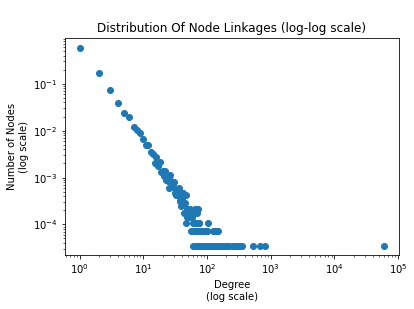

In [24]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

## degree distribution

x, y = plot_degree_histogram(graph)
plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(x, y, 'o')

- degree distribution could show us whales in marketplaces?
- nft galleries? :)
    
**Degree distribution at a **

- degree distribution change 